In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

import pickle


In [2]:
# method used for saving object as pickle
def save_object_as_pickle(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

## Drzewa decyzyjne

### Classification

#### Breast cancer

In [3]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [26]:
# split the dataset
X = data_breast_cancer['data']
y = data_breast_cancer['frame'].target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X.columns
data_breast_cancer['frame'].target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [5]:
f1_train = []
f1_test = []
acc_test = []
acc_train = []
depth_range = [x for x in range(1,10)]

for depth in range(1, 10):
    print("DEPTH: ", depth)
    tree_clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    tree_clf.fit(X_train,y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)
    f1_train_val = f1_score(y_train, y_pred_train)
    f1_test_val = f1_score(y_test, y_pred_test)
    f1_train.append(f1_train_val)
    f1_test.append(f1_test_val)
    acc_test.append(tree_clf.score(X_train, y_train))
    acc_train.append(tree_clf.score(X_test, y_test))
    print(f1_train)
    print(f1_test)
    print(acc_test)
    print(acc_train)

DEPTH:  1
[0.9366197183098592]
[0.9130434782608696]
[0.9208791208791208]
[0.8947368421052632]
DEPTH:  2
[0.9366197183098592, 0.9452054794520547]
[0.9130434782608696, 0.9452054794520549]
[0.9208791208791208, 0.9296703296703297]
[0.8947368421052632, 0.9298245614035088]
DEPTH:  3
[0.9366197183098592, 0.9452054794520547, 0.9826388888888888]
[0.9130434782608696, 0.9452054794520549, 0.9583333333333334]
[0.9208791208791208, 0.9296703296703297, 0.978021978021978]
[0.8947368421052632, 0.9298245614035088, 0.9473684210526315]
DEPTH:  4
[0.9366197183098592, 0.9452054794520547, 0.9826388888888888, 0.9965156794425087]
[0.9130434782608696, 0.9452054794520549, 0.9583333333333334, 0.9577464788732394]
[0.9208791208791208, 0.9296703296703297, 0.978021978021978, 0.9956043956043956]
[0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315]
DEPTH:  5
[0.9366197183098592, 0.9452054794520547, 0.9826388888888888, 0.9965156794425087, 0.9965156794425087]
[0.9130434782608696, 0.945205479452

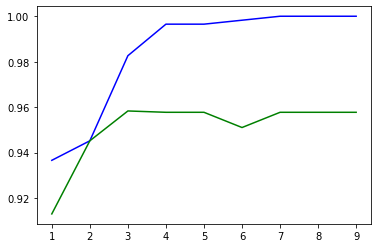

In [6]:
plt.plot(depth_range, f1_train, 'b')
plt.plot(depth_range, f1_test, 'g')

# depth = 3 wyglada legit

### Decision tree - classification visualisation

In [7]:
# # create decision tree classifier for the most optimal depth = 3 
# tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
# tree_clf.fit(X_train,y_train)
# y_pred = tree_clf.predict(X)

In [8]:
# create decision tree classifier for the most optimal depth = 3 
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X)

In [9]:
# f = "bc"

# graph = Source(
#             export_graphviz(
#                 tree_clf,
#                 out_file=None,
#                 rounded=True,
#                 filled=True
#             )
#     )

# graph.format = 'png'
# graph.render(f,view=False)

 ### Tree picture
 To save picture of the decision tree go to the terminal and type in this command (with ease works in the WSL): <br>
 `dot -Tpng poly_tree.dot -o poly_tree.png` 

### save data to pickle

In [10]:
depth = 3
f1_train_depth = f1_train[depth-1]
f1_test_depth = f1_test[depth-1]
acc_test_depth = acc_test[depth-1]
acc_train_depth = acc_train[depth-1]

class_f1acc_tree = [depth, f1_train_depth, f1_test_depth, acc_test_depth, acc_train_depth] 

In [11]:
class_f1acc_tree

[3,
 0.9826388888888888,
 0.9583333333333334,
 0.978021978021978,
 0.9473684210526315]

In [12]:
filename = "f1acc_tree.pkl"
save_object_as_pickle(class_f1acc_tree, filename)

## Regression

<AxesSubplot:xlabel='x', ylabel='y'>

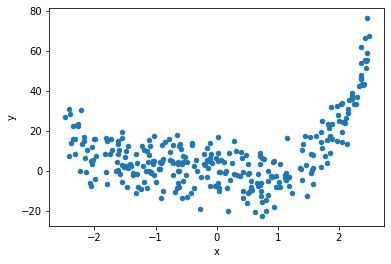

In [13]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [14]:
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
MSE_train = []
MSE_test = []
acc_test = []
acc_train = []
depth_range = [x for x in range(1,12)]

for depth in range(1, 12):
    print("DEPTH: ", depth)
    tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    tree_reg.fit(X_train,y_train)
    y_pred_train = tree_reg.predict(X_train)
    y_test_train = tree_reg.predict(X_test)
    MSE_train_val = mean_squared_error(y_train, y_pred_train)
    MSE_test_val = mean_squared_error(y_test, y_test_train)
    MSE_train.append(MSE_train_val)
    MSE_test.append(MSE_test_val)
    acc_test.append(tree_reg.score(X_train, y_train))
    acc_train.append(tree_reg.score(X_test, y_test))
    print(MSE_train)
    print(MSE_test)
    print(acc_test)
    print(acc_train)

DEPTH:  1
[108.63949358701014]
[159.79367874522802]
[0.5520678262741388]
[0.5689090453925272]
DEPTH:  2
[108.63949358701014, 75.26186415144979]
[159.79367874522802, 112.06449281452551]
[0.5520678262741388, 0.689687338416954]
[0.5689090453925272, 0.6976727141876456]
DEPTH:  3
[108.63949358701014, 75.26186415144979, 61.41857980832107]
[159.79367874522802, 112.06449281452551, 108.96592681582393]
[0.5520678262741388, 0.689687338416954, 0.7467646704495865]
[0.5689090453925272, 0.6976727141876456, 0.7060320171637304]
DEPTH:  4
[108.63949358701014, 75.26186415144979, 61.41857980832107, 54.41065150921439]
[159.79367874522802, 112.06449281452551, 108.96592681582393, 105.09247848484388]
[0.5520678262741388, 0.689687338416954, 0.7467646704495865, 0.7756591033366445]
[0.5689090453925272, 0.6976727141876456, 0.7060320171637304, 0.716481795601382]
DEPTH:  5
[108.63949358701014, 75.26186415144979, 61.41857980832107, 54.41065150921439, 45.55057006795426]
[159.79367874522802, 112.06449281452551, 108.96

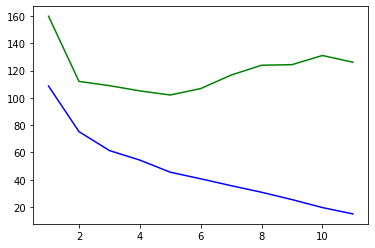

In [16]:
plt.plot(depth_range, MSE_train, 'b')
plt.plot(depth_range, MSE_test, 'g')

### Chosen depth based on the min value of test MSE 

In [17]:
# get index of min value in MSE_test array and increment by 1 
# to get depth starting from 1, not 0
depth = min(range(len(MSE_test)), key=MSE_test.__getitem__) + 1
print(depth)

tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X)

5


In [18]:
plt.clf()

X_as_flat_list = [item for sublist in X for item in sublist]
d = {'X': X_as_flat_list, 'y_pred': y_pred}

pred_data = pd.DataFrame(data=d)
pred_data = pred_data.sort_values(by='X')
pred_data.head()

,X,y_pred
60,-2.489498,31.343560
89,-2.412069,31.343560
113,-2.410321,31.343560
115,-2.407167,28.663435
222,-2.378451,15.561116


<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='x', ylabel='y'>

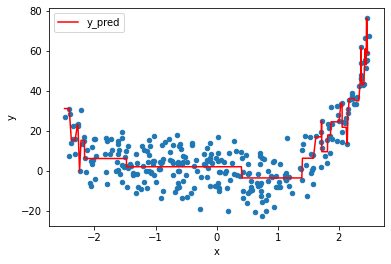

In [19]:
ax = pred_data.plot.line(x='X',y='y_pred', color ='red')
df.plot.scatter(x='x',y='y', ax=ax)

### Decision tree - regression visualisation

 ### Tree picture
 To save picture of the decision tree go to the terminal and type in this command (with ease works in the WSL): <br>
 `dot -Tpng poly_tree.dot -o poly_tree.png` 

In [20]:
## create png of the decision tree
# ! dot -Tpng reg.dot -o reg.png

### save data to pickle

In [21]:
MSE_train_depth = MSE_train[depth-1]
MSE_test_depth = MSE_test[depth-1]

class_f1acc_tree = [depth, MSE_train_depth, MSE_test_depth] 

In [22]:
class_f1acc_tree

[5, 45.55057006795426, 102.10255492819853]

In [23]:
filename = "mse_tree.pkl"
save_object_as_pickle(class_f1acc_tree, filename)

### CHECK SAVED DATA

In [24]:
# check if pickles are saved correctly
print("f1acc_tree.pkl\n", pd.read_pickle("f1acc_tree.pkl"))
print("mse_tree.pkl\n", pd.read_pickle("mse_tree.pkl"))

f1acc_tree.pkl
 [3, 0.9826388888888888, 0.9583333333333334, 0.978021978021978, 0.9473684210526315]
mse_tree.pkl
 [5, 45.55057006795426, 102.10255492819853]


## Save decision trees to png file

### Save Decision tree to png - classification

In [ ]:
from sklearn import tree

f = "reg"

graph = Source(
            export_graphviz(
                tree_reg,
                out_file=None,
                feature_names=df.columns[0],
                class_names=df.columns[1],
                rounded=True,
                filled=True
            )
    )

graph.format = 'png'
graph.render(f,view=False)

### Save Decision tree to png - classification

In [ ]:
f = "bc"

graph = Source(
            export_graphviz(
                tree_clf,
                feature_names=data_breast_cancer['data'].columns,
                
                out_file=None,
                rounded=True,
                filled=True
            )
    )

graph.format = 'png'
graph.render(f,view=False)

 ### Tree picture
 To save picture of the decision tree go to the terminal and type in this command (with ease works in the WSL): <br>
 `dot -Tpng poly_tree.dot -o poly_tree.png` 